# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [2]:
# Establish DB connection
conn = sqlite3.connect('C:/Users/vsoman/Desktop/Project Assignment/opportunitywithmgglobalservices/Tech Test/Tech Test/Pru Data Test/Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [3]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [7]:
sqlite_query = """
select 
"Product Name" , avg("Policy Value")
from Policy_Table
group by "Product Name"
"""

pd.read_sql(sqlite_query, conn)

## We can see that Product STANDARD ANNUITY does not have any Policy_value

,Product Name,"avg(""Policy Value"")"
0,CORPORATE MEMBERSHIP,5697.285714
1,FOCUSSED ISA,5746.341270
2,NHS PENSION,5241.500000
3,PRU BOND,4516.389831
4,PRUDENTIAL INVESTMENT PLAN,5084.515152
5,PRUDENTIAL ISA,5161.135593
6,RETIREMENT ACCOUNT,504964.959960
7,SIPP,5335.842466
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [8]:
sqlite_query = """
select * from Policy_Table
where "Customer ID" in (select "Customer ID" from Policy_Table where "Product Category" = "PENSION")
and date("Policy Start Date") between "2017-01-01" and "2017-03-31"
"""
pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,321,RET100707,CO285665,RETIREMENT,RETIREMENT ACCOUNT,236531.0,2017-01-01 00:00:00
1,322,RET100716,CO514095,RETIREMENT,RETIREMENT ACCOUNT,835937.0,2017-01-02 00:00:00
2,323,RET100509,CO692552,RETIREMENT,RETIREMENT ACCOUNT,347087.0,2017-01-03 00:00:00
3,324,RET100301,CO660405,RETIREMENT,RETIREMENT ACCOUNT,983191.0,2017-01-03 00:00:00
4,325,RET100157,CO545789,RETIREMENT,RETIREMENT ACCOUNT,753454.0,2017-01-03 00:00:00
5,326,RET100215,CO21590,RETIREMENT,RETIREMENT ACCOUNT,3455.0,2017-01-05 00:00:00
6,327,RET100806,CO791640,RETIREMENT,RETIREMENT ACCOUNT,989181.0,2017-01-06 00:00:00
7,328,RET100126,CO624220,RETIREMENT,RETIREMENT ACCOUNT,42805.0,2017-01-07 00:00:00
8,329,RET100617,CO172013,RETIREMENT,RETIREMENT ACCOUNT,388248.0,2017-01-07 00:00:00
9,330,RET100420,CO462135,RETIREMENT,RETIREMENT ACCOUNT,57119.0,2017-01-08 00:00:00


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [9]:
sqlite_query = """
select a."Customer ID",max("Policy Value"), min("Policy_Value_Snapshot"),
(max("Policy Value") - min("Policy_Value_Snapshot")) as "Difference"
from Policy_Table a, Fund_Table b
where a."Customer ID" = b."Customer ID"
group by a."Customer ID"
order by "Difference" Desc
limit 1

"""

pd.read_sql(sqlite_query, conn)

,Customer ID,"max(""Policy Value"")","min(""Policy_Value_Snapshot"")",Difference
0,CO517259,997883.0,1027.0,996856.0


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [10]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [11]:
#Insert your answer below: 
null_email_value_index = pd.isnull(Customer_Table["Email"])
Customer_Table[null_email_value_index]

,index,Customer ID,Email,Gender,Age,Postcode
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288
5,5,CO777973,None,Female,90,None
6,6,CO311505,None,Male,90,None
7,7,CO474987,None,Female,89,None
8,8,CO496581,None,Female,89,36520-000
9,9,CO862381,None,Male,89,8301
22,22,CO401070,None,Female,88,None


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [12]:
# Insert your answer below: 
# To solve this issue, following steps needs to be carried out
# 1) Group by Fund_table and Policy_Table on Customer id and merge them
# 2) Merge output of Ste 1 with Customer_table on Customer ID
# 3) Remove unwanted columns
# 4) Graphically Display association of 

temp_fund_table = Fund_Table.groupby('Customer ID')['Policy_Value_Snapshot'].sum().sort_values().reset_index()
temp_fund_table.rename(columns={'Policy_Value_Snapshot':'Policy Value'},inplace=True)
temp_fund_table

,Customer ID,Policy Value
0,CO850786,25147.0
1,CO28776,43669.5
2,CO135924,71017.0
3,CO105424,84302.0
4,CO131348,99544.0
...,...,...
994,CO636568,19470811.5
995,CO800253,19602156.0
996,CO410118,19756247.0
997,CO85863,20002142.5


In [13]:
temp_policy_table = Policy_Table.groupby('Customer ID')['Policy Value'].sum().sort_values().reset_index()
temp_policy_fund_table = pd.concat([temp_policy_table,temp_fund_table])
temp_policy_fund_table = temp_policy_fund_table.groupby('Customer ID')['Policy Value'].sum().sort_values().reset_index()
temp_policy_fund_table

,Customer ID,Policy Value
0,CO850786,33639.0
1,CO28776,46246.5
2,CO105424,86764.0
3,CO135924,110089.0
4,CO131348,116180.0
...,...,...
994,CO636568,20464941.5
995,CO800253,20594146.0
996,CO410118,20749662.0
997,CO85863,20974232.5


In [14]:
customer_merge=pd.merge(Customer_Table,temp_policy_fund_table,on='Customer ID')
customer_merge

,index,Customer ID,Email,Gender,Age,Postcode,Policy Value
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None,6486626.0
1,1,CO314757,None,Female,90,None,2122434.0
2,2,CO720602,None,Female,90,None,4131818.0
3,3,CO34804,None,Female,90,1495-701,9086447.0
4,4,CO474411,None,Male,90,301288,2785832.0
...,...,...,...,...,...,...,...
994,994,CO957494,CFRAMMINGHAM37@STUMBLEUPON.COM,Female,27,92736,2205816.5
995,995,CO503828,RRICCIARDELLI38@GOOGLE.COM,Male,24,None,5895093.5
996,996,CO340813,ODYZARTMY@SAMSUNG.COM,Male,22,None,11477395.5
997,997,CO403019,VENDLENT@MICROSOFT.COM,Female,22,735 41,2237301.5


In [15]:
# Although this specific data set has less volume, still it is good practice to remove unwanted column
# Check whether input data has any missing/un-expected value
customer_merge.isnull().sum()

index             0
Customer ID       0
Email            47
Gender            0
Age               0
Postcode        538
Policy Value      0
dtype: int64

In [16]:
# we can see Postcode has almost 50% of null values also Email does not have any impact on Policy Value, 
# lets drop those columns
customer_merge.drop(columns=['Email','Postcode'],axis=1,inplace=True)
customer_merge

,index,Customer ID,Gender,Age,Policy Value
0,0,CO183683,Male,90,6486626.0
1,1,CO314757,Female,90,2122434.0
2,2,CO720602,Female,90,4131818.0
3,3,CO34804,Female,90,9086447.0
4,4,CO474411,Male,90,2785832.0
...,...,...,...,...,...
994,994,CO957494,Female,27,2205816.5
995,995,CO503828,Male,24,5895093.5
996,996,CO340813,Male,22,11477395.5
997,997,CO403019,Female,22,2237301.5


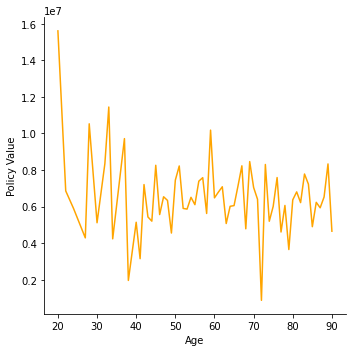

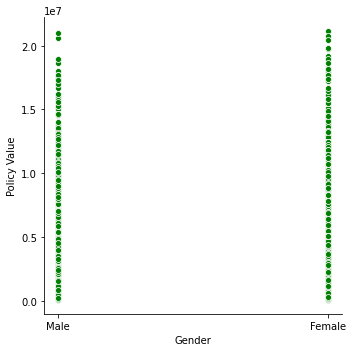

In [17]:
## Lets graphically shows co-relation between Age and Policy Value and Gender and Policy Value
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x ="Age", y ="Policy Value", kind='line',data = customer_merge,color='orange',ci=None)
sns.relplot(x ="Gender", y ="Policy Value",data = customer_merge,color='green')

In [ ]:
## Conclusion : we can see maximum amount of policies were bought by customers of 20 Age while almost equal amount of policies 
## were bought by Male and Female customers.